#### Question 1

True Negatives (TN) matter for ROC but not for PR curves. This is because the ROC curve depends on False Positive Rate (FPR), which includes TN in its calculation: $FPR = \frac{FP}{FP + TN}$

The PR curve depends only on Precision and Recall, which do not include TN: 

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP+FN}$

Therefore True Negatives (TN) impact the ROC curve but not the PR curve. 

Both the ROC curve and the PR curve are created by varying the decision threshold. At each threshold, the same (TP, FP, FN, TN) values are used. 

Since TP, FP, and FN determine both ROC and PR points, every ROC point has a unique PR curve equivalent. 

#### Question 2

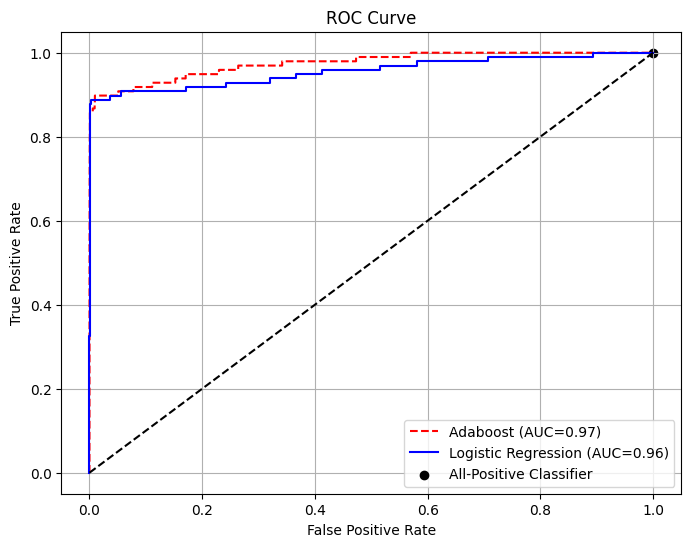

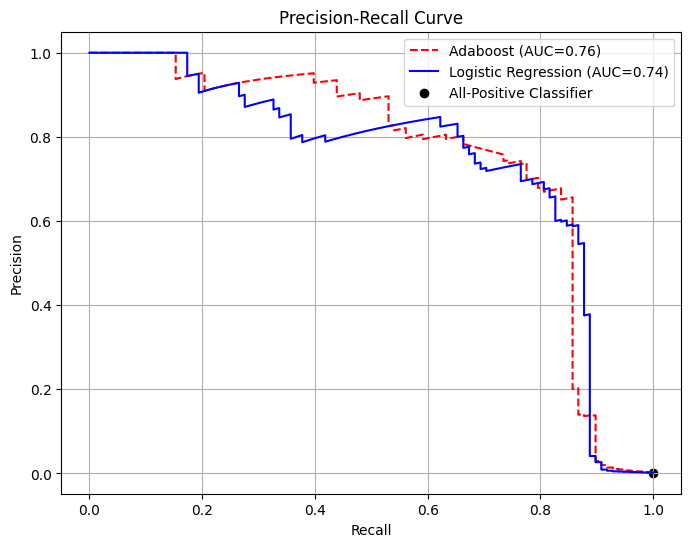

In [1]:
import openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# loading a credit card dataset from OpenML (dataset id: 1597)
dataset = openml.datasets.get_dataset(1597)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# coverting target to binary (already binary but ensuring correct type)
y = y.astype(int)

# splitting into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# normalizing features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# defining classifiers
adaboost = AdaBoostClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=500)

# training classifiers
adaboost.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# getting predictions for ROC and PR curves
y_scores_adaboost = adaboost.predict_proba(X_test)[:, 1]
y_scores_logreg = log_reg.predict_proba(X_test)[:, 1]

# computing ROC and PR curves
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_scores_adaboost)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_scores_logreg)

precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_scores_adaboost)
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_scores_logreg)

# computing area under curve (AUC) for both
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
pr_auc_adaboost = auc(recall_adaboost, precision_adaboost)
pr_auc_logreg = auc(recall_logreg, precision_logreg)

# defining all-positive classifier (always predicts 1)
all_positive_precision = sum(y_test) / len(y_test)
all_positive_recall = 1.0  # since all positives are correctly classified
all_positive_fpr = 1.0
all_positive_tpr = 1.0  # all positives are "true positives"

# plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'Adaboost (AUC={roc_auc_adaboost:.2f})', linestyle='--', color='red')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC={roc_auc_logreg:.2f})', linestyle='-', color='blue')
plt.scatter(all_positive_fpr, all_positive_tpr, color='black', label='All-Positive Classifier', marker='o')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# plotting PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_adaboost, precision_adaboost, label=f'Adaboost (AUC={pr_auc_adaboost:.2f})', linestyle='--', color='red')
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AUC={pr_auc_logreg:.2f})', linestyle='-', color='blue')
plt.scatter(all_positive_recall, all_positive_precision, color='black', label='All-Positive Classifier', marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()
